<a href="https://colab.research.google.com/github/author-sanjay/DeepLearning/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

##Data (Preparing and Loading)

In [53]:
#known
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight+bias*X
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

###Training and testing

In [54]:
#create and train test split
train_split= int(0.8*len(X))
x_train , y_train=X[:train_split],y[:train_split]
x_test,y_test=X[train_split:],y[train_split:]


###Visualize


In [55]:
def plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b", s=4,label="training data")
  plt.scatter(test_data,test_labels,c="g", s=7,label="test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r", s=4,label="Predictions")

  plt.legend(prop={"size":14})
  

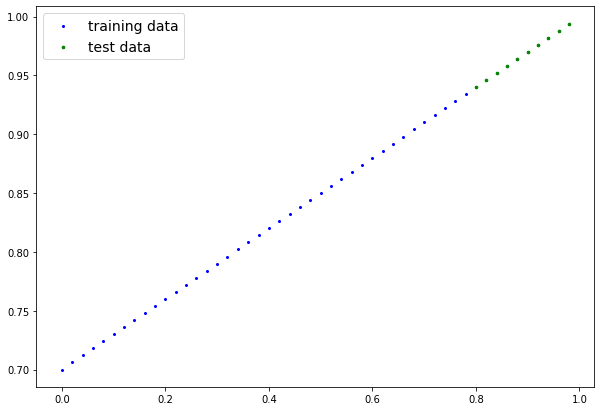

In [56]:
plot_prediction()

##Building first model



###What this does:
1. Start with random values
2. Look at the training data and adjust the random values to better represent the ideal values 

###But How?
1. Gradient Decent Algo
2. Backpropagation


In [57]:
#Create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor: #-> means returns and x: means x is of Torch Tensor type
   return self.weight*x+self.bias

#any subclass of nn module has a forward methond where the logic of the computation is stored. In This case we are using the regression formula



##Pytorch Model Building essentials

* torch.nn - contains all the building for computation graphs 
* torch.nn.parameter- what parameters should outr model try and learn
* torch.nn.Module- The base class for all nn modules. If you subclass It you should overwrite forward method
* torch.optim- This is where the optimizers in PyTorch live. They will help with gradient Decent 

* def forward( )- Defines what happens in the forward computation...

* torch.utils.data.Dataset - represents a map between key and sample pairs of your data such as images and their associated labels

* torch.utils.data.Dataloader - creates a python iterable over a torch dataset. 

In [58]:

torch.manual_seed(42)

model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [59]:
# List named parameters

model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
# Make predictions with our model using torch.inference_mode()

with torch.inference_mode():
  y_preds=model_0(x_test)
  

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [61]:
y_test

tensor([[0.9400],
        [0.9460],
        [0.9520],
        [0.9580],
        [0.9640],
        [0.9700],
        [0.9760],
        [0.9820],
        [0.9880],
        [0.9940]])

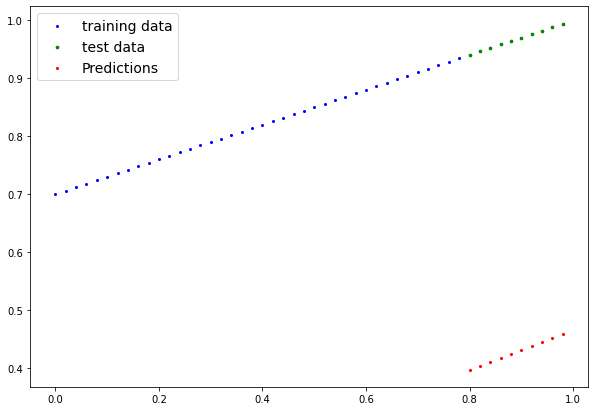

In [62]:
plot_prediction(predictions=y_preds)

##Training Model


---

One way is to use the loss function 

##Things we need
* **Loss Function**
* **Optimizer**


In [63]:
#SetUp a Loss Function
loss_fn=nn.L1Loss()

#SetUp a Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr = learning rate 


###Training loop

1. loop through the data
2. forward Pass
3. Calculate the loss 
4. Optimizer zero grad
5. Loss backward
6. Optimizer step


In [69]:
torch.manual_seed(42)
epochs=200

for epoch in range(epochs):
  model_0.train()  #sets all para to require grade true
  
  y_pred=model_0(x_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()
  
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(x_test)

    test_loss=loss_fn(test_pred,y_test)
  
  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss: {loss} | Test Loss: {test_loss}")
  
  print(model_0.state_dict())

Epoch:0 | Loss: 0.025997888296842575 | Test Loss: 0.05985529348254204
OrderedDict([('weight', tensor([0.4276])), ('bias', tensor([0.6463]))])
OrderedDict([('weight', tensor([0.4260])), ('bias', tensor([0.6473]))])
OrderedDict([('weight', tensor([0.4242])), ('bias', tensor([0.6478]))])
OrderedDict([('weight', tensor([0.4226])), ('bias', tensor([0.6488]))])
OrderedDict([('weight', tensor([0.4208])), ('bias', tensor([0.6493]))])
OrderedDict([('weight', tensor([0.4190])), ('bias', tensor([0.6498]))])
OrderedDict([('weight', tensor([0.4174])), ('bias', tensor([0.6508]))])
OrderedDict([('weight', tensor([0.4156])), ('bias', tensor([0.6513]))])
OrderedDict([('weight', tensor([0.4140])), ('bias', tensor([0.6523]))])
OrderedDict([('weight', tensor([0.4122])), ('bias', tensor([0.6528]))])
Epoch:10 | Loss: 0.02256198786199093 | Test Loss: 0.05226977914571762
OrderedDict([('weight', tensor([0.4106])), ('bias', tensor([0.6538]))])
OrderedDict([('weight', tensor([0.4088])), ('bias', tensor([0.6543])

In [70]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

In [71]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3018])), ('bias', tensor([0.6903]))])

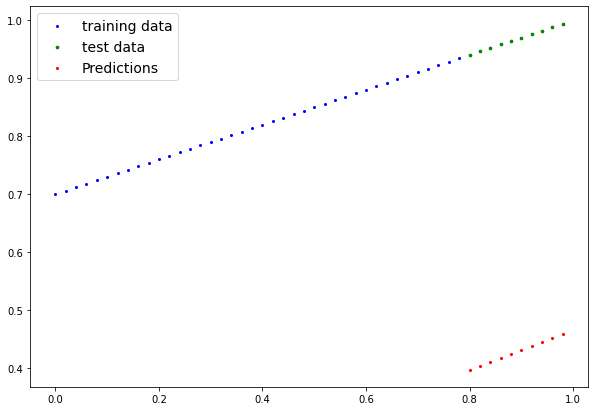

In [72]:
plot_prediction(predictions=y_preds)

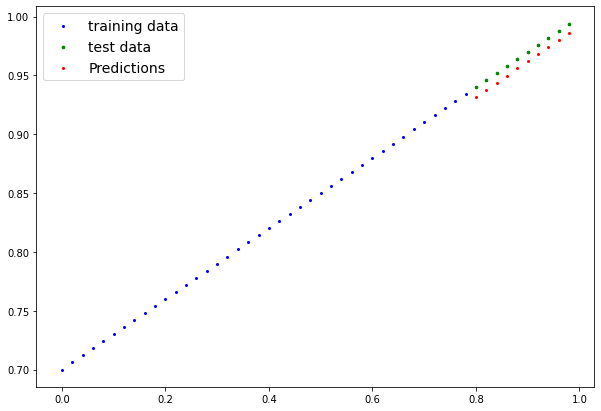

In [73]:
plot_prediction(predictions=y_preds_new)